## Data Dictionary
To start, you will be working with two files, `grammys_live_web_analytics.csv` and `ra_live_web_analytics.csv`.

These files will contain the following information:

- **date** - The date the data was confirmed. It is in `yyyy-mm-dd` format.
- **visitors** - The number of users who went on the website on that day.
- **pageviews** - The number of pages that all users viewed on the website.
- **sessions** - The total number of sessions on the website. A session is a group of user interactions with your website that take place within a given time frame. For example a single session can contain multiple page views, events, social interactions.
- **bounced_sessions** - The total number of bounced sessions on the website. A bounced session is when a visitor comes to the website and does not interact with any pages / links and leaves.
- **avg_session_duration_secs** - The average length for all session durations for all users that came to the website that day.
- **awards_week** - A binary flag if the dates align with marketing campaigns before and after the Grammys award ceremony was held. This is the big marketing push to get as many eyeballs watching the event.
- **awards_night** - The actual night that Grammy Awards event was held.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
# this formats numbers to two decimal places when shown in pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
# Read in dataframes
full_df = pd.read_csv("datasets/grammy_live_web_analytics.csv")
rec_academy = pd.read_csv("datasets/ra_live_web_analytics.csv")

In [5]:
# preview full_df dataframe
full_df.head()

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2017-01-01,9611,21407,10196,6490,86,0,0
1,2017-01-02,10752,25658,11350,7055,100,0,0
2,2017-01-03,11425,27062,12215,7569,92,0,0
3,2017-01-04,13098,29189,13852,8929,90,0,0
4,2017-01-05,12234,28288,12990,8105,95,0,0


In [6]:
# preview rec_academy dataframe
rec_academy.head()

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2022-02-01,928,2856,1092,591,148,0,0
1,2022-02-02,1329,3233,1490,923,90,0,0
2,2022-02-03,1138,3340,1322,754,127,0,0
3,2022-02-04,811,2552,963,534,142,0,0
4,2022-02-05,541,1530,602,326,111,0,0


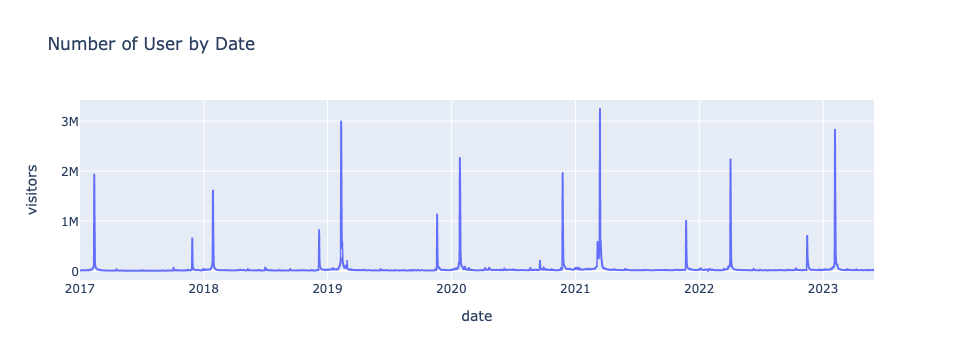

In [8]:
# Plot a line chart of the visitors on the site.
Number_of_User_by_Date = px.line(full_df, x = "date", y = "visitors", title = "Number of User by Date")
Number_of_User_by_Date.show()

What can you say about the visitors to the website by looking at the graph?

There are noticeable spikes in visitor numbers around the start of each year, particularly in January, February, and March. These spikes may correlate with the period after the announcement of nominees. Additionally, the graph exhibits intermittent smaller spikes, which are likely associated with the announcement of nominees later in the year. This suggests that users are particularly engaged during the time leading up to major music events like the Grammys, with increased interest around nominee announcements and the awards ceremony itself.

In [10]:
visitors_by_awards_night = full_df.groupby("awards_night")["visitors"].mean()
visitors_by_awards_night

awards_night
0     32388.28
1   1389590.23
Name: visitors, dtype: float64

What can you say about these results? Roughly how many more visitors are on the website for the awards ceremony versus a regular day?

On average, the number of visitors on the website during an awards night is substantially higher, with approximately 1,389,590 visitors compared to the average of 32,388 visitors on a regular day. This signifies the tremendous surge in user engagement and interest during the Grammy Awards ceremony. The challenge The Recording Academy faces is transitioning from a model reliant on a single annual event to one that sustains user engagement year-round.

In [9]:
# Split the data to separate the full_df into two new dataframes.
# One for before the switch of the websites and one for after

combined_site = full_df[full_df["date"] < "2022-02-01"]
grammys = full_df[full_df["date"] >= "2022-02-01"]

In [ ]:
# Run the following cell - DO NOT MODIFY
# .copy() prevents pandas from printing a scary-looking warning message
combined_site = combined_site.copy()
grammys = grammys.copy()

In [ ]:
# print the shape of the combined_site dataframe
combined_site.shape

(1857, 8)

In [ ]:
# create the list of dataframes
frames = [combined_site, rec_academy, grammys]

In [ ]:
# create the `pages_per_session` column for all 3 dataframes.
for frame in frames:
    frame["pages_per_session"] = frame["pageviews"] / frame["sessions"]

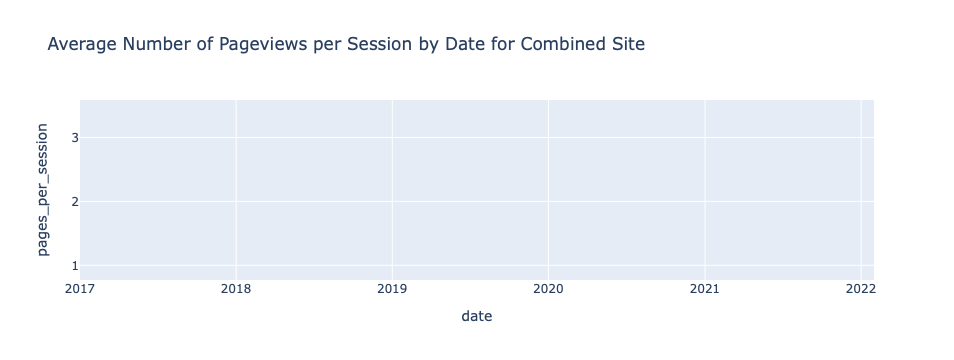

In [ ]:
# combined_site graph
combined_site_pps = px.line(frames[0], x = "date", y = "pages_per_session", title = "Average Number of Pageviews per Session by Date for Combined Site")
combined_site_pps.show()

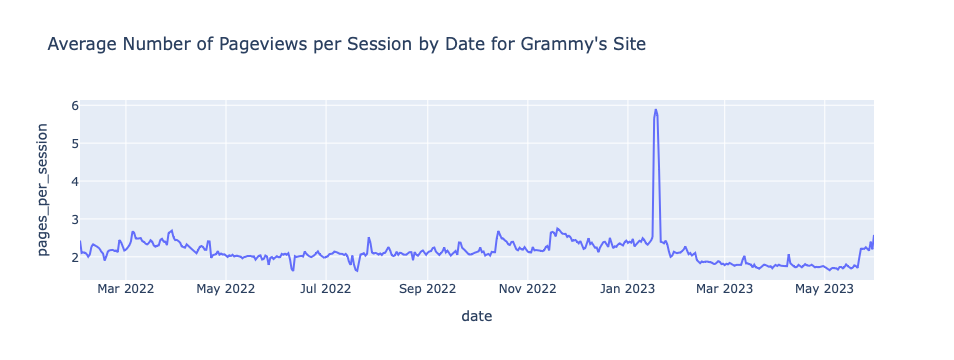

In [ ]:
# grammys graph
grammys_pps = px.line(frames[2], x = "date", y = "pages_per_session", title = "Average Number of Pageviews per Session by Date for Grammy's Site")
grammys_pps.show()

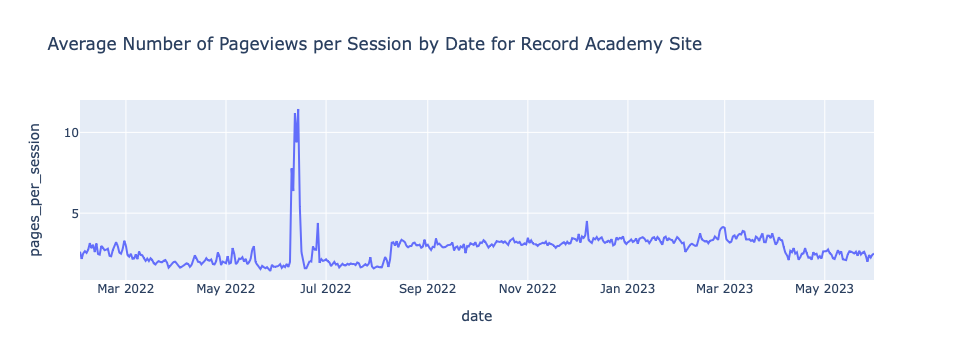

In [ ]:
# rec_academy graph
rec_academy_pps = px.line(frames[1], x = "date", y = "pages_per_session", title = "Average Number of Pageviews per Session by Date for Record Academy Site")
rec_academy_pps.show()

*Looking at the 3 charts above, what can you say about the `pages_per_session` when the websites were combined versus after they were split?


The combined site initially experienced a peak in early 2019, which subsided in subsequent years, possibly indicating an impact of content restructuring. In contrast, the Grammys site displayed pronounced spikes around Grammy Awards events, indicating heightened engagement during those occasions. The Record Academy site demonstrated relatively consistent user interaction, possibly due to a steady content flow. The split allowed for tailored engagement strategies, showcasing distinct patterns that mirrored significant events or content changes, emphasizing the sites' ability to cater to diverse user preferences and events.

In [ ]:
def bounce_rate(dataframe):
    '''
    Calculates the bounce rate for visitors on the website.
    input: dataframe with bounced_sessions and sessions columns
    output: numeric value from bounce rate
    '''
    sum_bounced = dataframe["bounced_sessions"].sum()
    sum_sessions = dataframe["sessions"].sum()
    
    return 100 * sum_bounced / sum_sessions





In [26]:
# Calculate the Bounce Rate for each site. Use the frames list you created in Task 6.
# Loop over each dataframe to calculate and print the bounce rate
for i, frame in enumerate(frames):
    rate = bounce_rate(frame)
    site_name = ["Combined Site", "Recording Academy", "Grammys"][i]
    print(f"Bounce rate for {site_name} is: {rate:.2f}%")


Bounce rate for Combined Site is: 41.58%
Bounce rate for Recording Academy is: 33.67%
Bounce rate for Grammys is: 40.16%


In [31]:
# Calculate the average of the avg_session_duration_secs. Use the frames list you created in Task 6.
for i, frame in enumerate(frames):
    avg_duration = frame['avg_session_duration_secs'].mean()
    site_name = ["Combined Site", "Recording Academy", "Grammys"][i]
    print(f"Average session duration for {site_name}: {avg_duration:.2f} seconds")


Average session duration for Combined Site: 102.85 seconds
Average session duration for Recording Academy: 128.50 seconds
Average session duration for Grammys: 82.99 seconds


What can you say about these two metrics as it relates to each of the websites?

The bounce rate and average session duration metrics provide insights into user engagement and interaction on each website. The Recording Academy site exhibits the lowest bounce rate (33.67%), indicating a greater proportion of users who actively engage with its content. This suggests a well-targeted and engaging user experience. In contrast, both the Combined Site (41.58%) and Grammys site (40.16%) have slightly higher bounce rates, suggesting room for improvement in retaining visitors. However, the Combined Site's longer average session duration (102.85 seconds) compared to the Grammys site (82.99 seconds) suggests that despite a higher bounce rate, visitors on the Combined Site tend to explore content more extensively once engaged. The Recording Academy's longer average session duration (128.50 seconds) further accentuates its ability to captivate and retain users with its content, aligning with its lower bounce rate and indicating a strong user connection.


In [32]:
# read in the files
age_grammys = pd.read_csv("datasets/grammys_age_demographics.csv")
age_tra = pd.read_csv("datasets/tra_age_demographics.csv")

In [33]:
# preview the age_grammys file. the age_tra will look very similar.
print(age_grammys)
print(age_tra)

  age_group  pct_visitors
0     18-24         27.37
1     25-34         24.13
2     35-44         18.72
3     45-54         13.57
4     55-64          9.82
5       65+          6.39
  age_group  pct_visitors
0     18-24         27.12
1     25-34         26.16
2     35-44         19.55
3     45-54         13.82
4     55-64          8.24
5       65+          5.12


In [34]:
# create the website column
age_grammys['website'] = 'Grammys'
age_tra['website'] = 'Recording Academy'

In [39]:
# use pd.concat to join the two datasets
age_df = pd.concat([age_grammys, age_tra])
age_df.shape

(12, 3)

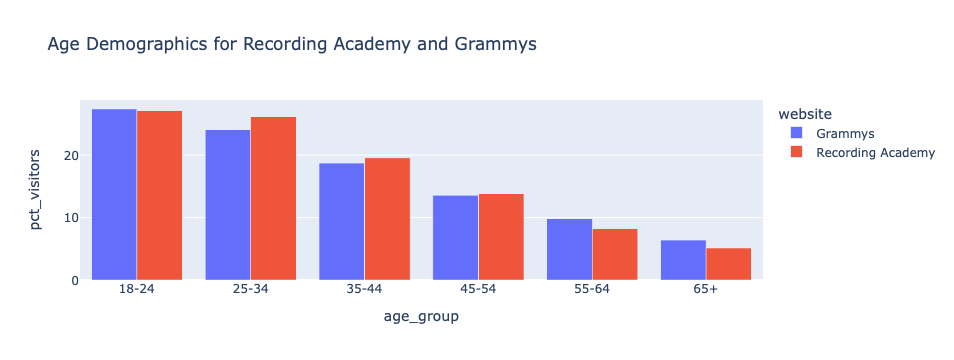

In [40]:
# Create bar chart
age_chart = px.bar(age_df, x='age_group', y='pct_visitors', color='website', barmode='group',
             title='Age Demographics for Recording Academy and Grammys')
age_chart.show()

Looking at the chart above, what can you say about how the age demographics differ between the two websites?

The analysis of age demographics reveals a consistent trend across various age groups for both the Grammys and Recording Academy websites, with slight variations in certain categories. Both sites attract comparable percentages of visitors in the 18-24 and 25-34 age ranges. Similarly, there is a closely aligned distribution in the 35-44 and 45-54 groups. However, the Grammys site appears to have a slightly higher engagement in the 55-64 and 65+ age groups compared to the Recording Academy. These differences suggest that while both websites capture a broad range of age demographics, the Grammys site may have a relatively stronger appeal among older audiences, potentially due to its music event focus, highlighting the significance of tailored content strategies for diverse age segments.


Using the work you did in this project, would you recommend that the websites stay separate? Please give a 2-3 paragraph answer using details from the analysis work above explaining why or why not they should stay separate.

Based on the comprehensive analysis conducted in this project, it is recommended that the Grammys and Recording Academy websites should indeed remain separate. The analysis offers several compelling insights that support this recommendation.

Firstly, the visitor trends exhibit distinct engagement patterns for each website. The Grammys site experiences notable spikes in visitor numbers around the beginning of each year, especially in the months of January, February, and March. These spikes are likely correlated with the announcement of nominees and the anticipation leading up to the Grammy Awards ceremony. This surge in interest underscores the significance of the Grammys event and its ability to attract heightened user engagement.

Secondly, the analysis of bounce rates and average session durations reveals crucial information about user interaction. The Recording Academy site stands out with a lower bounce rate (33.67%) and a longer average session duration (128.50 seconds), indicative of its effective content delivery and user engagement strategies. On the other hand, the Grammys site showcases higher bounce rates (40.16%) but compensates with a decent average session duration (82.99 seconds). This data suggests that while the Grammys site may experience a higher initial bounce rate, it manages to capture visitor attention effectively once engagement is established.

Lastly, the age demographics analysis underscores the value of separate websites. Both websites cater to a similar distribution of age groups, with subtle differences. The Grammys site appears to resonate slightly more with older age groups, aligning with the event's broader music industry focus. This emphasizes the need for tailored content strategies that address the preferences of distinct demographic segments.

In conclusion, the analysis showcases the unique strengths of each website and their ability to engage different audience segments effectively. While the Grammys site capitalizes on event-specific spikes and a diverse age demographic appeal, the Recording Academy site excels in sustaining user engagement and capturing a wider age range. By staying separate, both websites can continue to target their specific audiences more effectively, enhance user experience, and drive sustained engagement year-round.

# LevelUp

Ray and Harvey are both interested to see how the Grammys.com website compares to that of their main music award competitor, The American Music Awards (AMA). The dashboard below is aggregated information about the performace of The AMA website for the months of April, May, and June of 2023.

Your task is to determine how the Grammys website is performing relative to The AMA website. In particular, you will be looking at the device distribution and total visits over the same time span and leveraging information about Visit Duration, Bounce Rate, and Pages / Visit from your work in the core of this project.

![](figs/TheAMAs.png)

Let's review some of the content from above.

The **Total Visits** column is the total number of visitors on the website during the timespan given.
The **Device Distribution** is the percentage share of visitors coming from Desktop users (PCs, Macs, etc.) and Mobile Users (iPhone, Android, etc.).

Visitors on the AMA website are spending on average, 5 mins and 53 seconds on the site and viewing 2.74 pages per visit (aka session). They have a bounce rate of 54.31%

In [42]:
# Load in the data
desktop_users = pd.read_csv('datasets/desktop_users.csv')
mobile_users = pd.read_csv('datasets/mobile_users.csv')

In [43]:
# preview the desktop_users file
desktop_users.head()

,date,segment,visitors
0,2022-02-01,Desktop Traffic,10195
1,2022-02-02,Desktop Traffic,10560
2,2022-02-03,Desktop Traffic,9935
3,2022-02-04,Desktop Traffic,8501
4,2022-02-05,Desktop Traffic,5424


In [44]:
# preview mobile_users file
mobile_users.head()

,date,segment,visitors
0,2022-02-01,Mobile Traffic,23494
1,2022-02-02,Mobile Traffic,20234
2,2022-02-03,Mobile Traffic,22816
3,2022-02-04,Mobile Traffic,18592
4,2022-02-05,Mobile Traffic,13298


In [45]:
# change name of the visitors column to indicate which category it comes from
desktop_users.rename(columns={'visitors': 'desktop_visitors'}, inplace=True)
mobile_users.rename(columns={'Visitors': 'mobile_visitors'}, inplace=True)

In [60]:
# drop the segment column from each dataframe
desktop_users = desktop_users.drop(columns=['segment'], errors='ignore')
mobile_users = mobile_users.drop(columns=['segment'], errors='ignore')
desktop_users

,date,desktop_visitors
0,2022-02-01,10195
1,2022-02-02,10560
2,2022-02-03,9935
3,2022-02-04,8501
4,2022-02-05,5424
...,...,...
510,2023-06-26,4302
511,2023-06-27,5528
512,2023-06-28,4928
513,2023-06-29,5554


In [63]:
# join the two dataframes and preview the dataframe
segment_df = desktop_users.merge(mobile_users, on='date')
segment_df.head()

,date,desktop_visitors,mobile_visitors
0,2022-02-01,10195,23494
1,2022-02-02,10560,20234
2,2022-02-03,9935,22816
3,2022-02-04,8501,18592
4,2022-02-05,5424,13298


In [68]:
# create total_visitors column
segment_df['total_visitors'] = segment_df['desktop_visitors'] + segment_df['mobile_visitors']
segment_df

,date,desktop_visitors,mobile_visitors,total_visitors
0,2022-02-01,10195,23494,33689
1,2022-02-02,10560,20234,30794
2,2022-02-03,9935,22816,32751
3,2022-02-04,8501,18592,27093
4,2022-02-05,5424,13298,18722
...,...,...,...,...
510,2023-06-26,4302,7327,11629
511,2023-06-27,5528,9491,15019
512,2023-06-28,4928,9856,14784
513,2023-06-29,5554,12881,18435


In [78]:
# filter and calculate the percentage share

filtered_df = segment_df[segment_df['date'] >= '2023-04-01']
desktop_sum = filtered_df['desktop_visitors'].sum()
mobile_sum = filtered_df['mobile_visitors'].sum()
total_sum = filtered_df['total_visitors'].sum()

desktop_percentage = (desktop_sum / total_sum) * 100
mobile_percentage = (mobile_sum / total_sum) *100


print(f"The percentage share of desktop visitors on the Grammys website in the timeframe is {desktop_percentage:.2f}%")
print(f"The percentage share of mobile visitors on the Grammys website in the timeframe is {mobile_percentage:.2f}%")

print(f"The total number of visitors on the site during this timeframe is {total_sum}")

The percentage share of desktop visitors on the Grammys website in the timeframe is 31.84%
The percentage share of mobile visitors on the Grammys website in the timeframe is 68.16%
The total number of visitors on the site during this timeframe is 1428482


How is the Grammys website performing relative to its competitor? What is the Grammys doing well and what KPIs does it need to improve?


The Grammys website is performing relatively well compared to its competitor, the American Music Awards (AMA), based on the provided data. The Grammys website has a higher percentage share of mobile visitors (68.16%) compared to desktop visitors (31.84%) during the timeframe in question. This suggests that the Grammys website is effectively catering to mobile users, indicating a strong mobile user experience and potentially responsive design.

However, to provide a comprehensive assessment of its performance relative to the competitor, it's crucial to compare key performance indicators (KPIs) such as visit duration, bounce rate, and pages per visit. Unfortunately, the visit duration, bounce rate, and pages per visit metrics for the Grammys website are not provided in this context. To make a comprehensive judgment, it's important to analyze these metrics in comparison with the competitor's metrics.

If the Grammys website has better visit duration, lower bounce rate, and higher pages per visit compared to the competitor, it suggests that the Grammys website is more engaging and user-friendly. On the other hand, if the Grammys website lags behind in these metrics, there might be areas for improvement in user engagement and website usability.

In conclusion, while the Grammys website appears to have a strong mobile user experience, a detailed comparison of performance metrics with the competitor's metrics is necessary to provide a more precise assessment of its strengths and areas for improvement.